In [21]:
import pandas as pd
import numpy as np
from pathlib import Path
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import os
import glob
import random

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
data_dir = Path('/content/drive/MyDrive/Extrasensory/data') #Providing the path.

In [24]:
os.chdir(data_dir)
extension = 'csv'
data_file = [i for i in glob.glob('*.{}'.format(extension))] 
data_file_consideration = random.sample(data_file,10) # Selecting 10 random files for making model.

Concatenating the users

In [25]:
data = [] #for concatenating the users
for file in data_file_consideration:
  file = '/content/drive/MyDrive/Extrasensory/data/' + file
  df_from_each_valid_file = pd.read_csv(file)
  data.append(df_from_each_valid_file)

In [26]:
train_data = pd.concat(data)

In [27]:
train_data

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,...,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1464121019,0.998324,0.002305,-0.001051,0.003047,0.996775,0.998405,0.999863,2.512675,6.684609,5.043355,0.000038,0.000269,0.000227,0.002315,0.429624,2.434303,0.125439,0.009091,0.039830,0.997485,0.001530,0.001476,0.002304,0.014413,0.103386,0.006976,0.018115,0.000803,0.000352,0.001045,0.017762,0.017787,0.018813,1.949584,6.452644,5.048475,0.013535,0.053923,0.065971,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2
1,1464121067,0.998647,0.052570,-0.038628,0.162579,0.996334,0.998367,1.000086,0.393254,6.683137,5.041590,0.003241,0.043267,0.038128,1.265329,0.461793,6.457836,0.177034,0.007890,0.005468,0.997504,0.024089,0.029099,0.059390,-0.202364,0.241275,-0.072369,0.049876,0.113929,0.196091,0.273795,0.017596,0.018656,0.019865,0.656350,5.447103,4.889032,5.082275,5.649827,4.691303,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2
2,1464121796,1.004814,0.002468,0.000855,0.003526,1.003265,1.004725,1.006445,2.149035,6.684609,5.043265,0.000029,0.000161,0.000232,0.002117,0.429595,3.762095,0.097845,0.010975,-0.007871,1.004721,0.001480,0.001529,0.002469,0.031533,-0.054232,0.015736,0.011628,0.000911,0.000551,0.001158,0.011267,0.011329,0.012316,2.113873,6.453713,5.043596,0.009436,0.131734,0.140420,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2
3,1464121851,1.003934,0.008411,0.011053,0.027717,1.002040,1.003990,1.006022,0.701022,6.684577,5.043423,0.000048,0.000301,0.000341,0.081692,0.430882,0.040237,0.572285,0.011069,-0.007516,1.003841,0.002031,0.002034,0.008421,-0.181414,-0.052925,0.353452,0.011840,0.001393,0.001748,0.002814,0.011170,0.011525,0.012373,1.773878,6.450204,5.06

In [28]:
training_data_raw_acc = train_data.filter(regex=("raw_acc:.*"))

In [29]:
training_data_watch_acceleration = train_data.filter(regex=('watch_acceleration:.*'))

In [30]:
traget_data = train_data[['label:FIX_walking']]

In [31]:
training_data = pd.concat([training_data_raw_acc, training_data_watch_acceleration, traget_data], axis=1, join='inner')

In [32]:
training_data = training_data.dropna()

In [33]:
traget_data = training_data['label:FIX_walking']

In [34]:
print(traget_data)

2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
       ... 
7274    0.0
7275    0.0
7276    0.0
7277    0.0
7278    0.0
Name: label:FIX_walking, Length: 36539, dtype: float64


In [35]:
training_data = training_data.drop('label:FIX_walking', 1)

In [36]:
training_data.dropna()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_band1,watch_acceleration:spectrum:x_log_energy_band2,watch_acceleration:spectrum:x_log_energy_band3,watch_acceleration:spectrum:x_log_energy_band4,watch_acceleration:spectrum:y_log_energy_band0,watch_acceleration:spectrum:y_log_energy_band1,watch_acceleration:spectrum:y_log_energy_band2,watch_acceleration:spectrum:y_log_energy_band3,watch_acceleration:spectrum:y_log_energy_band4,watch_acceleration:spectrum:z_log_energy_band0,watch_acceleration:spectrum:z_log_energy_band1,watch_acceleration:spectrum:z_log_energy_band2,watch_acceleration:spectrum:z_log_energy_band3,watch_acceleration:spectrum:z_log_energy_band4,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range0,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range1,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range2,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range3,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range4
2,1.004814,0.002468,0.000855,0.003526,1.003265,1.004725,1.006445,2.149035,6.684609,5.043265,0.000029,0.000161,0.000232,0.002117,0.429595,3.762095,0.097845,0.010975,-0.007871,1.004721,0.001480,0.001529,0.002469,0.031533,-0.054232,0.015736,1010.033560,102.751970,159.952962,247.894072,994.062372,1002.620566,1011.201266,1.108253,5.986723,5.039211,0.023389,0.083399,0.042203,0.111629,0.432370,0.973937,0.149520,74.420000,80.720000,-954.540000,47.780159,271.927273,176.911584,0.014730,0.160219,0.811212,4.913156,1.526710,1.790076,1.088317,1.723624,6.102805,4.045285,5.174851,3.078945,2.918010,5.092256,0.057653,0.100669,0.048622,0.125868,0.982120,0.964314,0.942005,0.907445,0.667449
3,1.003934,0.008411,0.011053,0.027717,1.002040,1.003990,1.006022,0.701022,6.684577,5.043423,0.000048,0.000301,0.000341,0.081692,0.430882,0.040237,0.572285,0.011069,-0.007516,1.003841,0.002031,0.002034,0.008421,-0.181414,-0.052925,0.353452,997.941066,17.858001,14.838928,27.207524,985.332431,1000.415914,1008.571267,2.189287,5.991305,5.04

Splitting the data into training and validation

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
x_train, x_test, y_train, y_test = train_test_split(training_data,traget_data, test_size=0.2, random_state=100)

In [39]:
y_train = y_train.values.reshape(-1,1)

In [40]:
y_test = y_test.values.reshape(-1,1)

In [41]:
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')

x_train = scaler.fit_transform(x_train)
y_train = imputer.fit_transform(y_train)
x_test = scaler.fit_transform(x_test)
y_test = imputer.fit_transform(y_test)

In [42]:
# Training Logistic Regression.
model = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

In [43]:
result = model.score(x_test, y_test)

In [44]:
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 93.99%


K-fold Cross-Validation

In [45]:
from sklearn.model_selection import KFold #k-fold cross-validation

In [46]:
kfold = KFold(n_splits=10, shuffle=True)

In [47]:
from sklearn import model_selection

In [48]:
model_logitisc_regression = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0)
result_kfold = model_selection.cross_val_score(model_logitisc_regression, training_data, traget_data, cv=kfold)

In [49]:
print("Accuracy: %.2f%%" % (result_kfold.mean()*100.0)) 

Accuracy: 94.05%


Evaluating C parameter

In [50]:
# C value at 0.5.
# Training Logistic Regression.
model_1 = LogisticRegression(solver='liblinear', max_iter=1000, C=0.5)
model_1.fit(x_train, y_train)
result_1 = model_1.score(x_test, y_test)
print("Accuracy: %.2f%%" % (result_1*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 94.01%


In [51]:
# C value at 1.5.
# Training Logistic Regression.
model_2 = LogisticRegression(solver='liblinear', max_iter=1000, C=1.5)
model_2.fit(x_train, y_train)
result_2 = model_2.score(x_test, y_test)
print("Accuracy: %.2f%%" % (result_2*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 93.98%


Evaluating on Different Models

In [52]:
# Decision Tree (Default Hyperparameters.)
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(random_state=0)
result_kfold_decisionTree = model_selection.cross_val_score(decisionTreeModel, training_data, traget_data, cv=kfold)
print("Accuracy: %.2f%%" % (result_kfold_decisionTree.mean()*100.0)) 

Accuracy: 92.56%


In [53]:
# Decision Tree (Changing the criterion on Entropy)
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(random_state=0, criterion='entropy')
result_kfold_decisionTree = model_selection.cross_val_score(decisionTreeModel, training_data, traget_data, cv=kfold)
print("Accuracy: %.2f%%" % (result_kfold_decisionTree.mean()*100.0))

Accuracy: 92.99%


In [54]:
# Decision Tree (Changing the max_features to sqrt)
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(random_state=0, max_features="sqrt")
result_kfold_decisionTree = model_selection.cross_val_score(decisionTreeModel, training_data, traget_data, cv=kfold)
print("Accuracy: %.2f%%" % (result_kfold_decisionTree.mean()*100.0))

Accuracy: 92.13%


In [55]:
# Decision Tree (Changing the cost-Complexity Pruning=0.5)
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(random_state=0, ccp_alpha=0.5)
result_kfold_decisionTree = model_selection.cross_val_score(decisionTreeModel, training_data, traget_data, cv=kfold)
print("Accuracy: %.2f%%" % (result_kfold_decisionTree.mean()*100.0))

Accuracy: 92.70%


In [56]:
# Decision Tree (Changing the cost-Complexity Pruning=1.0)
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(random_state=0, ccp_alpha=1.0)
result_kfold_decisionTree = model_selection.cross_val_score(decisionTreeModel, training_data, traget_data, cv=kfold)
print("Accuracy: %.2f%%" % (result_kfold_decisionTree.mean()*100.0))

Accuracy: 92.70%


In [57]:
# SVM (Default Hyperparameters.)
from sklearn.svm import SVC
SVMModel = SVC()
result_kfold_SVC = model_selection.cross_val_score(SVMModel, training_data, traget_data, cv=kfold)
print("Accuracy: %.2f%%" % (result_kfold_SVC.mean()*100.0))

Accuracy: 93.45%


In [58]:
# SVM (Changing Regularization parameter = 0.5)
from sklearn.svm import SVC
SVMModel = SVC(C = 0.5)
result_kfold_SVC = model_selection.cross_val_score(SVMModel, training_data, traget_data, cv=kfold)
print("Accuracy: %.2f%%" % (result_kfold_SVC.mean()*100.0))

Accuracy: 93.15%


In [59]:
# SVM (Changing Regularization parameter = 1.5)
from sklearn.svm import SVC
SVMModel = SVC(C = 1.5)
result_kfold_SVC = model_selection.cross_val_score(SVMModel, training_data, traget_data, cv=kfold)
print("Accuracy: %.2f%%" % (result_kfold_SVC.mean()*100.0))

Accuracy: 93.53%


TESTING LOGISTIC MODEL ON UNSEEN DATA

In [60]:

unSeenDataList =  [i for i in glob.glob('*.{}'.format(extension)) if i not in data_file_consideration] # To avoid the duplication of data.
test_data_file_consideration = random.sample(unSeenDataList,5) #Selecting 5 random users for test.
test_data = []
for file in test_data_file_consideration:
  file = '/content/drive/MyDrive/Extrasensory/data/' + file
  df_from_each_test_file = pd.read_csv(file)
  test_data.append(df_from_each_test_file)
testing_data = pd.concat(test_data)

In [61]:
testing_data_raw_acc = testing_data.filter(regex=("raw_acc:.*"))
testing_data_watch_acceleration = testing_data.filter(regex=('watch_acceleration:.*'))
traget_test_data = testing_data[['label:FIX_walking']]
testing_data = pd.concat([testing_data_raw_acc, testing_data_watch_acceleration, traget_test_data], axis=1, join='inner')
testing_data = testing_data.dropna()
traget_test_data = testing_data['label:FIX_walking']
testing_data = testing_data.drop('label:FIX_walking', 1)
testing_data.dropna()


,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_band1,watch_acceleration:spectrum:x_log_energy_band2,watch_acceleration:spectrum:x_log_energy_band3,watch_acceleration:spectrum:x_log_energy_band4,watch_acceleration:spectrum:y_log_energy_band0,watch_acceleration:spectrum:y_log_energy_band1,watch_acceleration:spectrum:y_log_energy_band2,watch_acceleration:spectrum:y_log_energy_band3,watch_acceleration:spectrum:y_log_energy_band4,watch_acceleration:spectrum:z_log_energy_band0,watch_acceleration:spectrum:z_log_energy_band1,watch_acceleration:spectrum:z_log_energy_band2,watch_acceleration:spectrum:z_log_energy_band3,watch_acceleration:spectrum:z_log_energy_band4,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range0,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range1,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range2,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range3,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range4
0,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,0.022606,0.083165,0.432260,2.533760,0.114619,-0.592000,-55.824000,-1030.912000,9.109201,9.684680,17.198147,-0.045248,-0.117629,0.028053,4.775776,4.820572,5.866857,4.938766,5.503634,5.034010,1.224514,1.730564,1.093057,1.796074,5.045700,0.004994,0.023702,0.022539,0.083756,0.999849,0.999835,0.999836,0.999832,0.999819
1,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042

In [62]:
testing_data = scaler.fit_transform(testing_data)
testing_data_target = traget_test_data.values.reshape(-1,1)
testing_data_target = imputer.fit_transform(testing_data_target)

In [63]:
Test_result = model.score(testing_data, testing_data_target)
print("Accuracy on Unseen Data: %.2f%%" % (Test_result*100.0))

Accuracy on Unseen Data: 91.36%


Model Testing.

In [64]:
 # Balanced Accuracy Score
 from sklearn.metrics import balanced_accuracy_score
 y_pred = model.predict(x_test)

In [65]:
print("Balanced Accuracy Score of the logistic regression: ",balanced_accuracy_score(y_test,y_pred))

Balanced Accuracy Score of the logistic regression:  0.6611239608474122


In [66]:
# F1 Score.
from sklearn.metrics import f1_score
print('F1 Score for the logistic regression: ', f1_score(y_test,y_pred))

F1 Score for the logistic regression:  0.44640605296343006


In [67]:
# Precision 
from sklearn.metrics import precision_score
print('Precision for the logistic regression: ', precision_score(y_test,y_pred))

Precision for the logistic regression:  0.6679245283018868


In [68]:
# Recall
from sklearn.metrics import recall_score
print('Recall score for the logistic regression: ', recall_score(y_test,y_pred))

Recall score for the logistic regression:  0.3352272727272727


In [69]:
# ROC AUC score.
from sklearn.metrics import roc_auc_score
print('ROC AUC score for the logistic regression: ', roc_auc_score(y_test,y_pred))

ROC AUC score for the logistic regression:  0.6611239608474121


PLOTTING ROC

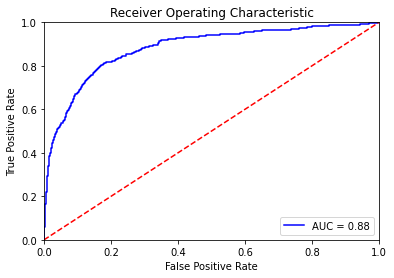

In [70]:
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

EXTENDING TO OTHER ACTIONS.

In [71]:
print(train_data.columns[-50:])#CHECKING ALL LABELS

Index(['label:FIX_walking', 'label:FIX_running', 'label:BICYCLING',
       'label:SLEEPING', 'label:LAB_WORK', 'label:IN_CLASS',
       'label:IN_A_MEETING', 'label:LOC_main_workplace', 'label:OR_indoors',
       'label:OR_outside', 'label:IN_A_CAR', 'label:ON_A_BUS',
       'label:DRIVE_-_I_M_THE_DRIVER', 'label:DRIVE_-_I_M_A_PASSENGER',
       'label:LOC_home', 'label:FIX_restaurant', 'label:PHONE_IN_POCKET',
       'label:OR_exercise', 'label:COOKING', 'label:SHOPPING',
       'label:STROLLING', 'label:DRINKING__ALCOHOL_', 'label:BATHING_-_SHOWER',
       'label:CLEANING', 'label:DOING_LAUNDRY', 'label:WASHING_DISHES',
       'label:WATCHING_TV', 'label:SURFING_THE_INTERNET', 'label:AT_A_PARTY',
       'label:AT_A_BAR', 'label:LOC_beach', 'label:SINGING', 'label:TALKING',
       'label:COMPUTER_WORK', 'label:EATING', 'label:TOILET', 'label:GROOMING',
       'label:DRESSING', 'label:AT_THE_GYM', 'label:STAIRS_-_GOING_UP',
       'label:STAIRS_-_GOING_DOWN', 'label:ELEVATOR', 'label:O

In [72]:
traget_data = train_data[['label:BICYCLING']]

In [73]:
training_data = pd.concat([training_data_raw_acc, training_data_watch_acceleration, traget_data], axis=1, join='inner')

In [74]:
training_data = training_data.dropna()
traget_data = training_data['label:BICYCLING']
training_data = training_data.drop('label:BICYCLING', 1)
training_data.dropna()

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_band1,watch_acceleration:spectrum:x_log_energy_band2,watch_acceleration:spectrum:x_log_energy_band3,watch_acceleration:spectrum:x_log_energy_band4,watch_acceleration:spectrum:y_log_energy_band0,watch_acceleration:spectrum:y_log_energy_band1,watch_acceleration:spectrum:y_log_energy_band2,watch_acceleration:spectrum:y_log_energy_band3,watch_acceleration:spectrum:y_log_energy_band4,watch_acceleration:spectrum:z_log_energy_band0,watch_acceleration:spectrum:z_log_energy_band1,watch_acceleration:spectrum:z_log_energy_band2,watch_acceleration:spectrum:z_log_energy_band3,watch_acceleration:spectrum:z_log_energy_band4,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range0,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range1,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range2,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range3,watch_acceleration:relative_directions:avr_cosine_similarity_lag_range4
0,1.014756,0.006813,-0.013912,0.024959,1.013165,1.014852,1.016667,0.848672,6.684589,5.042717,0.000258,0.001825,0.003272,0.030643,0.430011,3.675178,0.146054,0.007648,0.010766,-1.014653,0.004341,0.003784,0.006837,-0.281341,0.041913,-0.137753,1021.377077,191.963002,511.064713,858.266080,1000.255966,1016.157468,1031.100243,0.246886,6.204641,5.032487,0.067628,0.368135,0.348816,1.535133,0.480055,4.791600,0.077878,-357.616000,-6.192000,-785.952000,411.364418,117.913303,388.958360,0.183554,-0.497727,0.591703,6.106487,1.551997,1.170353,0.678403,1.011699,6.537347,5.217106,3.677930,1.893926,3.503090,5.547673,1.143962,1.216909,0.974074,2.498624,0.974773,0.928172,0.661524,0.720643,0.786816
2,1.015129,0.017623,0.022959,0.042535,1.012399,1.014696,1.016868,0.847418,6.684463,5.043630,0.039850,0.080577,0.034603,0.114768,0.433789,1.008632,0.116274,0.025516,0.015705,-1.010912,0.071982,0.043068,0.030323,0.748147,0.774538,0.634222,1020.080221,16.184663,-9.867310,25.427356,1016.031496,1016.456589,1024.406169,1.982826,6.2144

In [75]:
x_train, x_test, y_train, y_test = train_test_split(training_data,traget_data, test_size=0.2, random_state=100)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [76]:
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')

x_train = scaler.fit_transform(x_train)
y_train = imputer.fit_transform(y_train)
x_test = scaler.fit_transform(x_test)
y_test = imputer.fit_transform(y_test)

In [77]:
# Training Logistic Regression.
model = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

In [78]:
result = model.score(x_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 97.07%


K-Fold Cross Validation

In [79]:
model_logitisc_regression = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0)
result_kfold = model_selection.cross_val_score(model_logitisc_regression, training_data, traget_data, cv=kfold)

In [80]:
print("Accuracy: %.2f%%" % (result_kfold.mean()*100.0)) 

Accuracy: 96.74%


Model Testing for bicycling as target.

In [81]:
 # Balanced Accuracy Score
 from sklearn.metrics import balanced_accuracy_score
 y_pred = model.predict(x_test)
 print("Balanced Accuracy Score of the logistic regression: ",balanced_accuracy_score(y_test,y_pred))

Balanced Accuracy Score of the logistic regression:  0.7600799443865137


In [82]:
# F1 Score.
from sklearn.metrics import f1_score
print('F1 Score for the logistic regression: ', f1_score(y_test,y_pred))

F1 Score for the logistic regression:  0.6599999999999999


In [83]:
# Precision 
from sklearn.metrics import precision_score
print('Precision for the logistic regression: ', precision_score(y_test,y_pred))

Precision for the logistic regression:  0.8918918918918919


In [84]:
# Recall
from sklearn.metrics import recall_score
print('Recall score for the logistic regression: ', recall_score(y_test,y_pred))

Recall score for the logistic regression:  0.5238095238095238


In [85]:
# ROC AUC score.
from sklearn.metrics import roc_auc_score
print('ROC AUC score for the logistic regression: ', roc_auc_score(y_test,y_pred))

ROC AUC score for the logistic regression:  0.7600799443865137


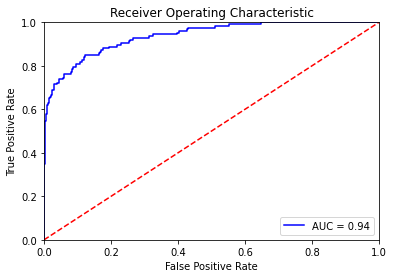

In [86]:
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()